In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("data_clean.csv")
print("Shape:", df.shape)
df = df.drop(columns=['Unnamed: 0'])
display(df.head())

Shape: (253680, 23)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18.0,15.0,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30.0,30.0,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11,5,4


In [3]:
decode_maps = {
    "Diabetes_binary": {0: "No Diabetes", 1: "Diabetes"},
    "HighBP": {0: "No", 1: "Yes"},
    "HighChol": {0: "No", 1: "Yes"},
    "CholCheck": {0: "No", 1: "Yes"},
    "Smoker": {0: "No", 1: "Yes"},
    "Stroke": {0: "No", 1: "Yes"},
    "HeartDiseaseorAttack": {0: "No", 1: "Yes"},
    "PhysActivity": {0: "No", 1: "Yes"},
    "Fruits": {0: "No", 1: "Yes"},
    "Veggies": {0: "No", 1: "Yes"},
    "HvyAlcoholConsump": {0: "No", 1: "Yes"},
    "AnyHealthcare": {0: "No", 1: "Yes"},
    "NoDocbcCost": {0: "No", 1: "Yes"},
    "DiffWalk": {0: "No", 1: "Yes"},
    "Sex": {0: "Female", 1: "Male"}
}

genhlth_map = {
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}

education_map = {
    1: "No schooling / Kindergarten",
    2: "Elementary (1–8)",
    3: "Some high school (9–11)",
    4: "High school graduate",
    5: "Some college / Technical",
    6: "College graduate"
}

income_map = {
    1: "< $10k",
    2: "$10k – $15k",
    3: "$15k – $20k",
    4: "$20k – $25k",
    5: "$25k – $35k",
    6: "$35k – $50k",
    7: "$50k – $75k",
    8: "≥ $75k"
}


def map_age_group(age_code):
    if age_code <= 4:
        return "18–39"
    elif age_code <= 7:
        return "40–54"
    elif age_code <= 9:
        return "55–64"
    else:
        return "65+"




df_decoded = df.copy()
df_decoded["GenHlth"] = df["GenHlth"].map(genhlth_map)
df_decoded["Education"] = df["Education"].map(education_map)
df_decoded["Income"] = df["Income"].map(income_map)
df_decoded["AgeGroup"] = df["Age"].apply(map_age_group)

for col, mapping in decode_maps.items():
    df_decoded[col] = df_decoded[col].map(mapping)

df_decoded.to_csv("data_decoded.csv", index=False)
df_decoded

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,AgeGroup
0,No Diabetes,Yes,Yes,Yes,40.0,Yes,No,No,No,No,...,No,Poor,18.0,15.0,Yes,Female,9,High school graduate,$15k – $20k,55–64
1,No Diabetes,No,No,No,25.0,Yes,No,No,Yes,No,...,Yes,Good,0.0,0.0,No,Female,7,College graduate,< $10k,40–54
2,No Diabetes,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,Yes,Poor,30.0,30.0,Yes,Female,9,High school graduate,≥ $75k,55–64
3,No Diabetes,Yes,No,Yes,27.0,No,No,No,Yes,Yes,...,No,Very good,0.0,0.0,No,Female,11,Some high school (9–11),$35k – $50k,65+
4,No Diabetes,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,...,No,Very good,3.0,0.0,No,Female,11,Some college / Technical,$20k – $25k,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,No Diabetes,Yes,Yes,Yes,45.0,No,No,No,No,Yes,...,No,Good,0.0,5.0,No,Male,5,College graduate,$50k – $75k,40–54
253676,Diabetes,Yes,Yes,Yes,18.0,No,No,No,No,No,...,No,Fair,0.0,0.0,Yes,Female,11,Elementary (1–8),$20k – $25k,65+
253677,No Diabetes,No,No,Yes,28.0,No,No,No,Yes,Yes,...,No,Excellent,0.0,0.0,No,Female,2,Some college / Technical,$10k – $15k,18–39
253678,No Diabetes,Yes,No,Yes,23.0,No,No,No,No,Yes,...,No,Good,0.0,0.0,No,Male,7,Some college / Technical,< $10k,40–54


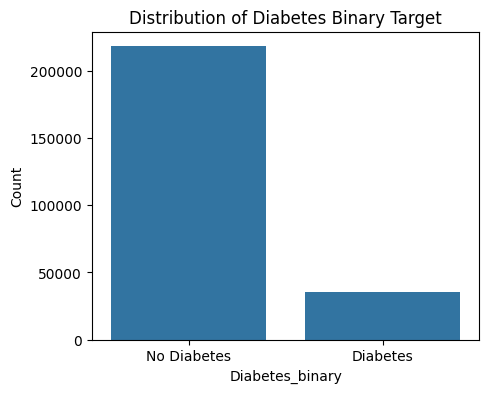

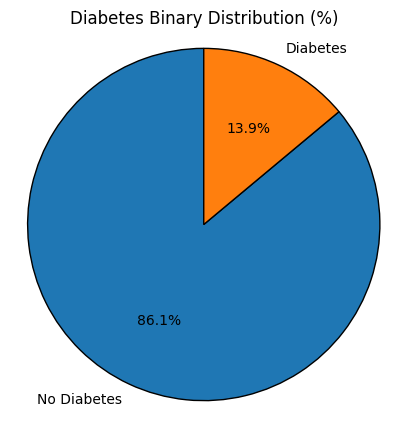

In [4]:
plt.figure(figsize=(5,4))
sns.countplot(data=df_decoded, x="Diabetes_binary")
plt.title("Distribution of Diabetes Binary Target")
plt.ylabel("Count")
plt.show()

target_counts = df_decoded["Diabetes_binary"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    target_counts.values,
    labels=target_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Diabetes Binary Distribution (%)")
plt.axis("equal") 
plt.show()

Numeric

In [5]:
numeric_cols = [
    col for col in df.columns
    if np.issubdtype(df[col].dtype, np.number)         
    and df[col].dropna().nunique() > 2                 
    and col != "Diabetes_binary"                        
]

print("Numeric columns:")
print(numeric_cols)

ordinal_cols = ["GenHlth", "Age", "Education", "Income"]
continuous_cols = [col for col in numeric_cols if col not in ordinal_cols]

df_decoded[continuous_cols].describe().T

Numeric columns:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0


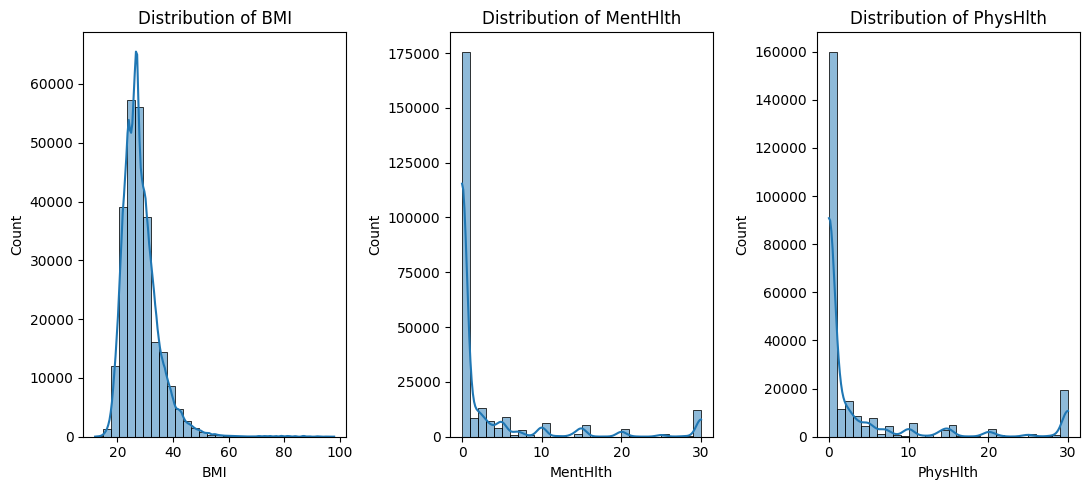

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(11,5)) 
for ax, col in zip(axes, continuous_cols): 
    sns.histplot(df_decoded[col], bins=30, kde=True, ax=ax) 
    ax.set_title(f"Distribution of {col}") 
plt.tight_layout() 
plt.show()

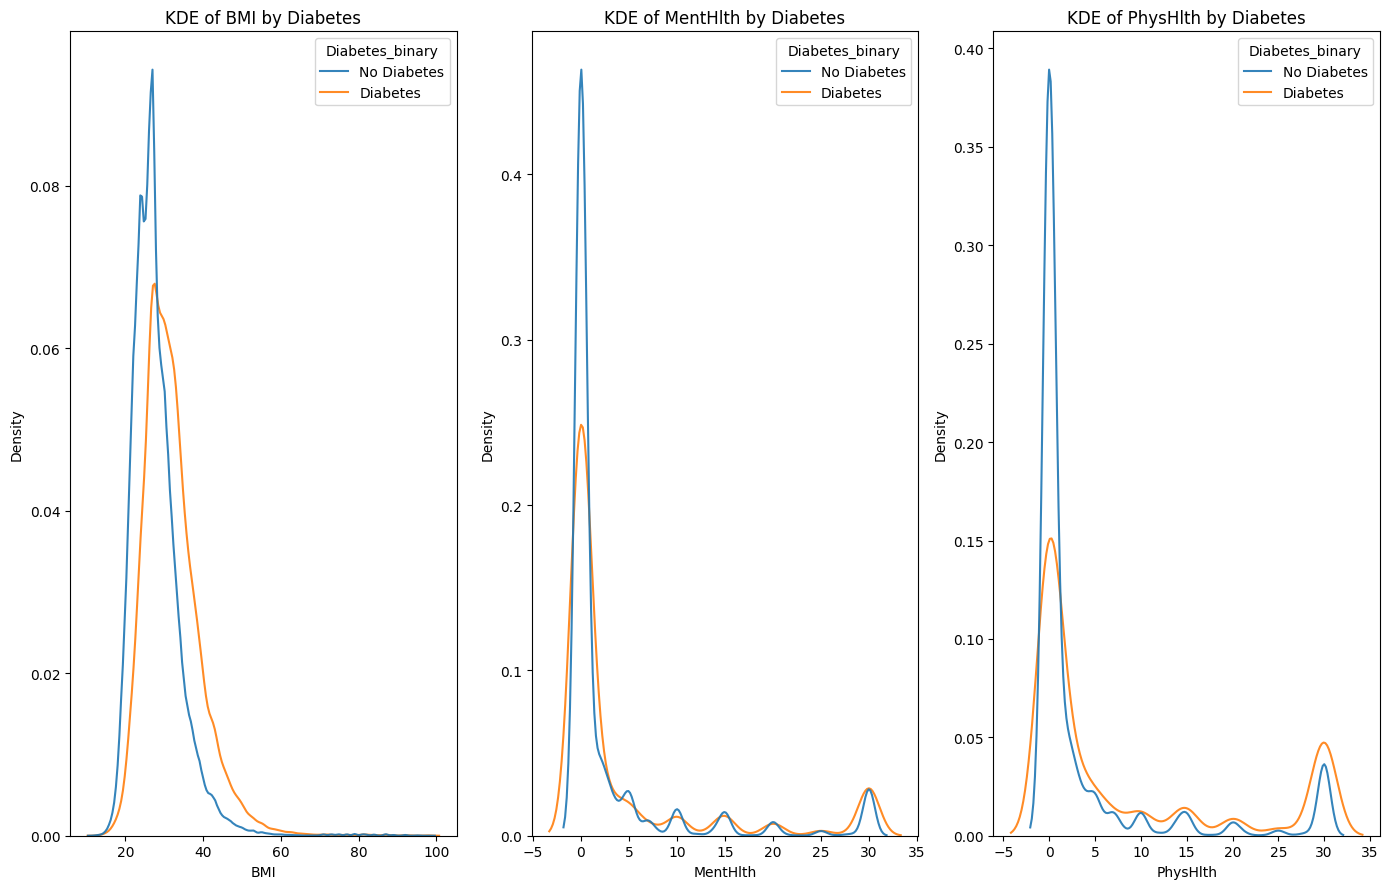

In [7]:
fig, axes = plt.subplots(1, len(continuous_cols), figsize=(14, 9))

for ax, col in zip(axes, continuous_cols):
    sns.kdeplot(
        data=df_decoded,
        x=col,
        hue="Diabetes_binary",
        common_norm=False,     
        fill=False,
        alpha=0.9,
        ax=ax
    )
    ax.set_title(f"KDE of {col} by Diabetes")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

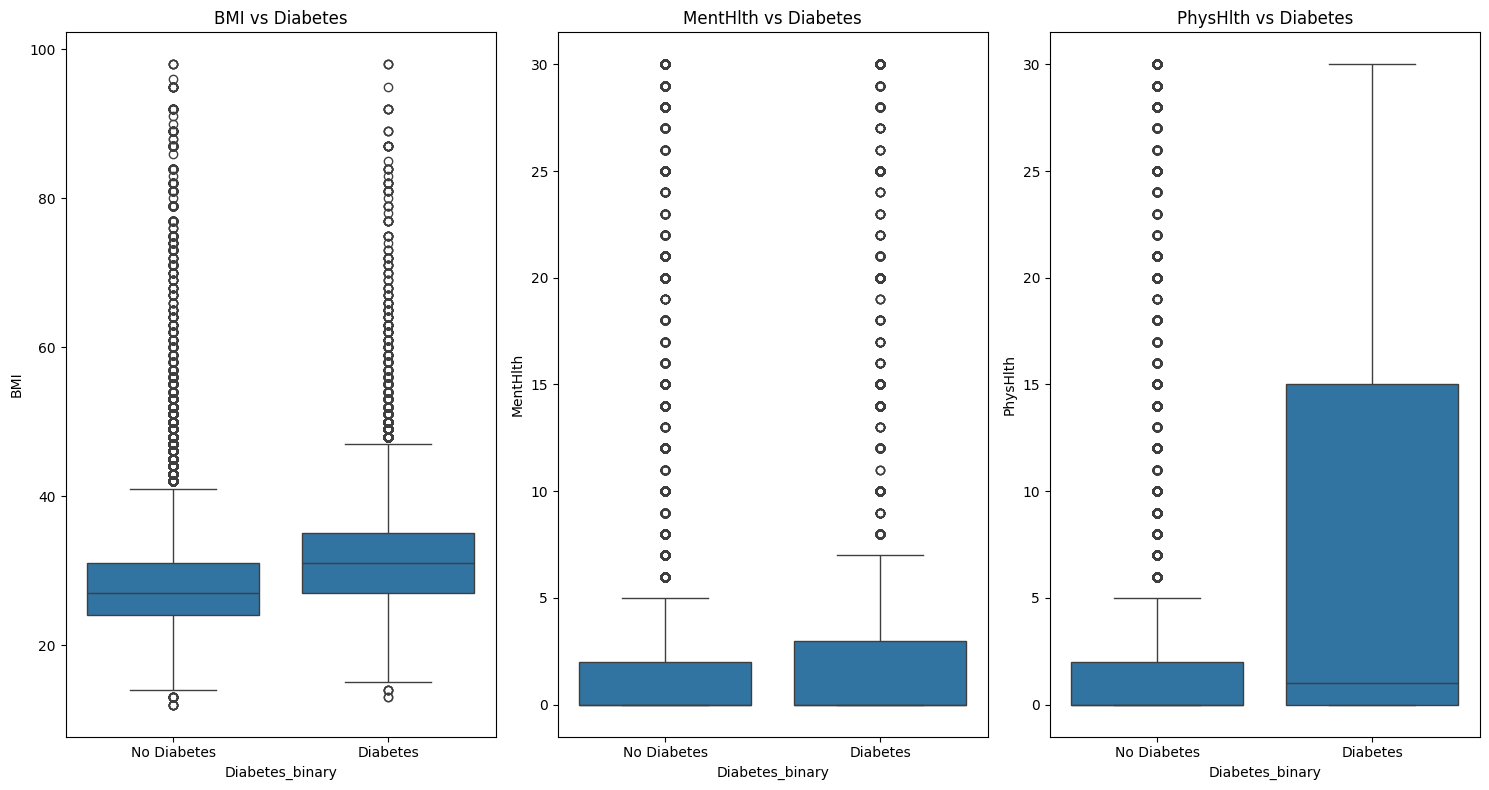

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,8))
for ax, col in zip(axes, continuous_cols):
    sns.boxplot(data=df_decoded,x="Diabetes_binary" ,  y=col, ax=ax)
    ax.set_title(f"{col} vs Diabetes")
plt.tight_layout()
plt.show()

Binary

In [9]:
binary_cols = [
    col for col in df.columns
    if df[col].dropna().nunique() == 2
    and set(df[col].dropna().unique()).issubset({0, 1})
]
binary_cols = [col for col in binary_cols if col != "Diabetes_binary"]
print("Binary columns:")
print(binary_cols)
df_decoded[binary_cols].describe().T

Binary columns:
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


,count,unique,top,freq
HighBP,253680,2,No,144851
HighChol,253680,2,No,146089
CholCheck,253680,2,Yes,244210
Smoker,253680,2,No,141257
Stroke,253680,2,No,243388
HeartDiseaseorAttack,253680,2,No,229787
PhysActivity,253680,2,Yes,191920
Fruits,253680,2,Yes,160898
Veggies,253680,2,Yes,205841
HvyAlcoholConsump,253680,2,No,239424


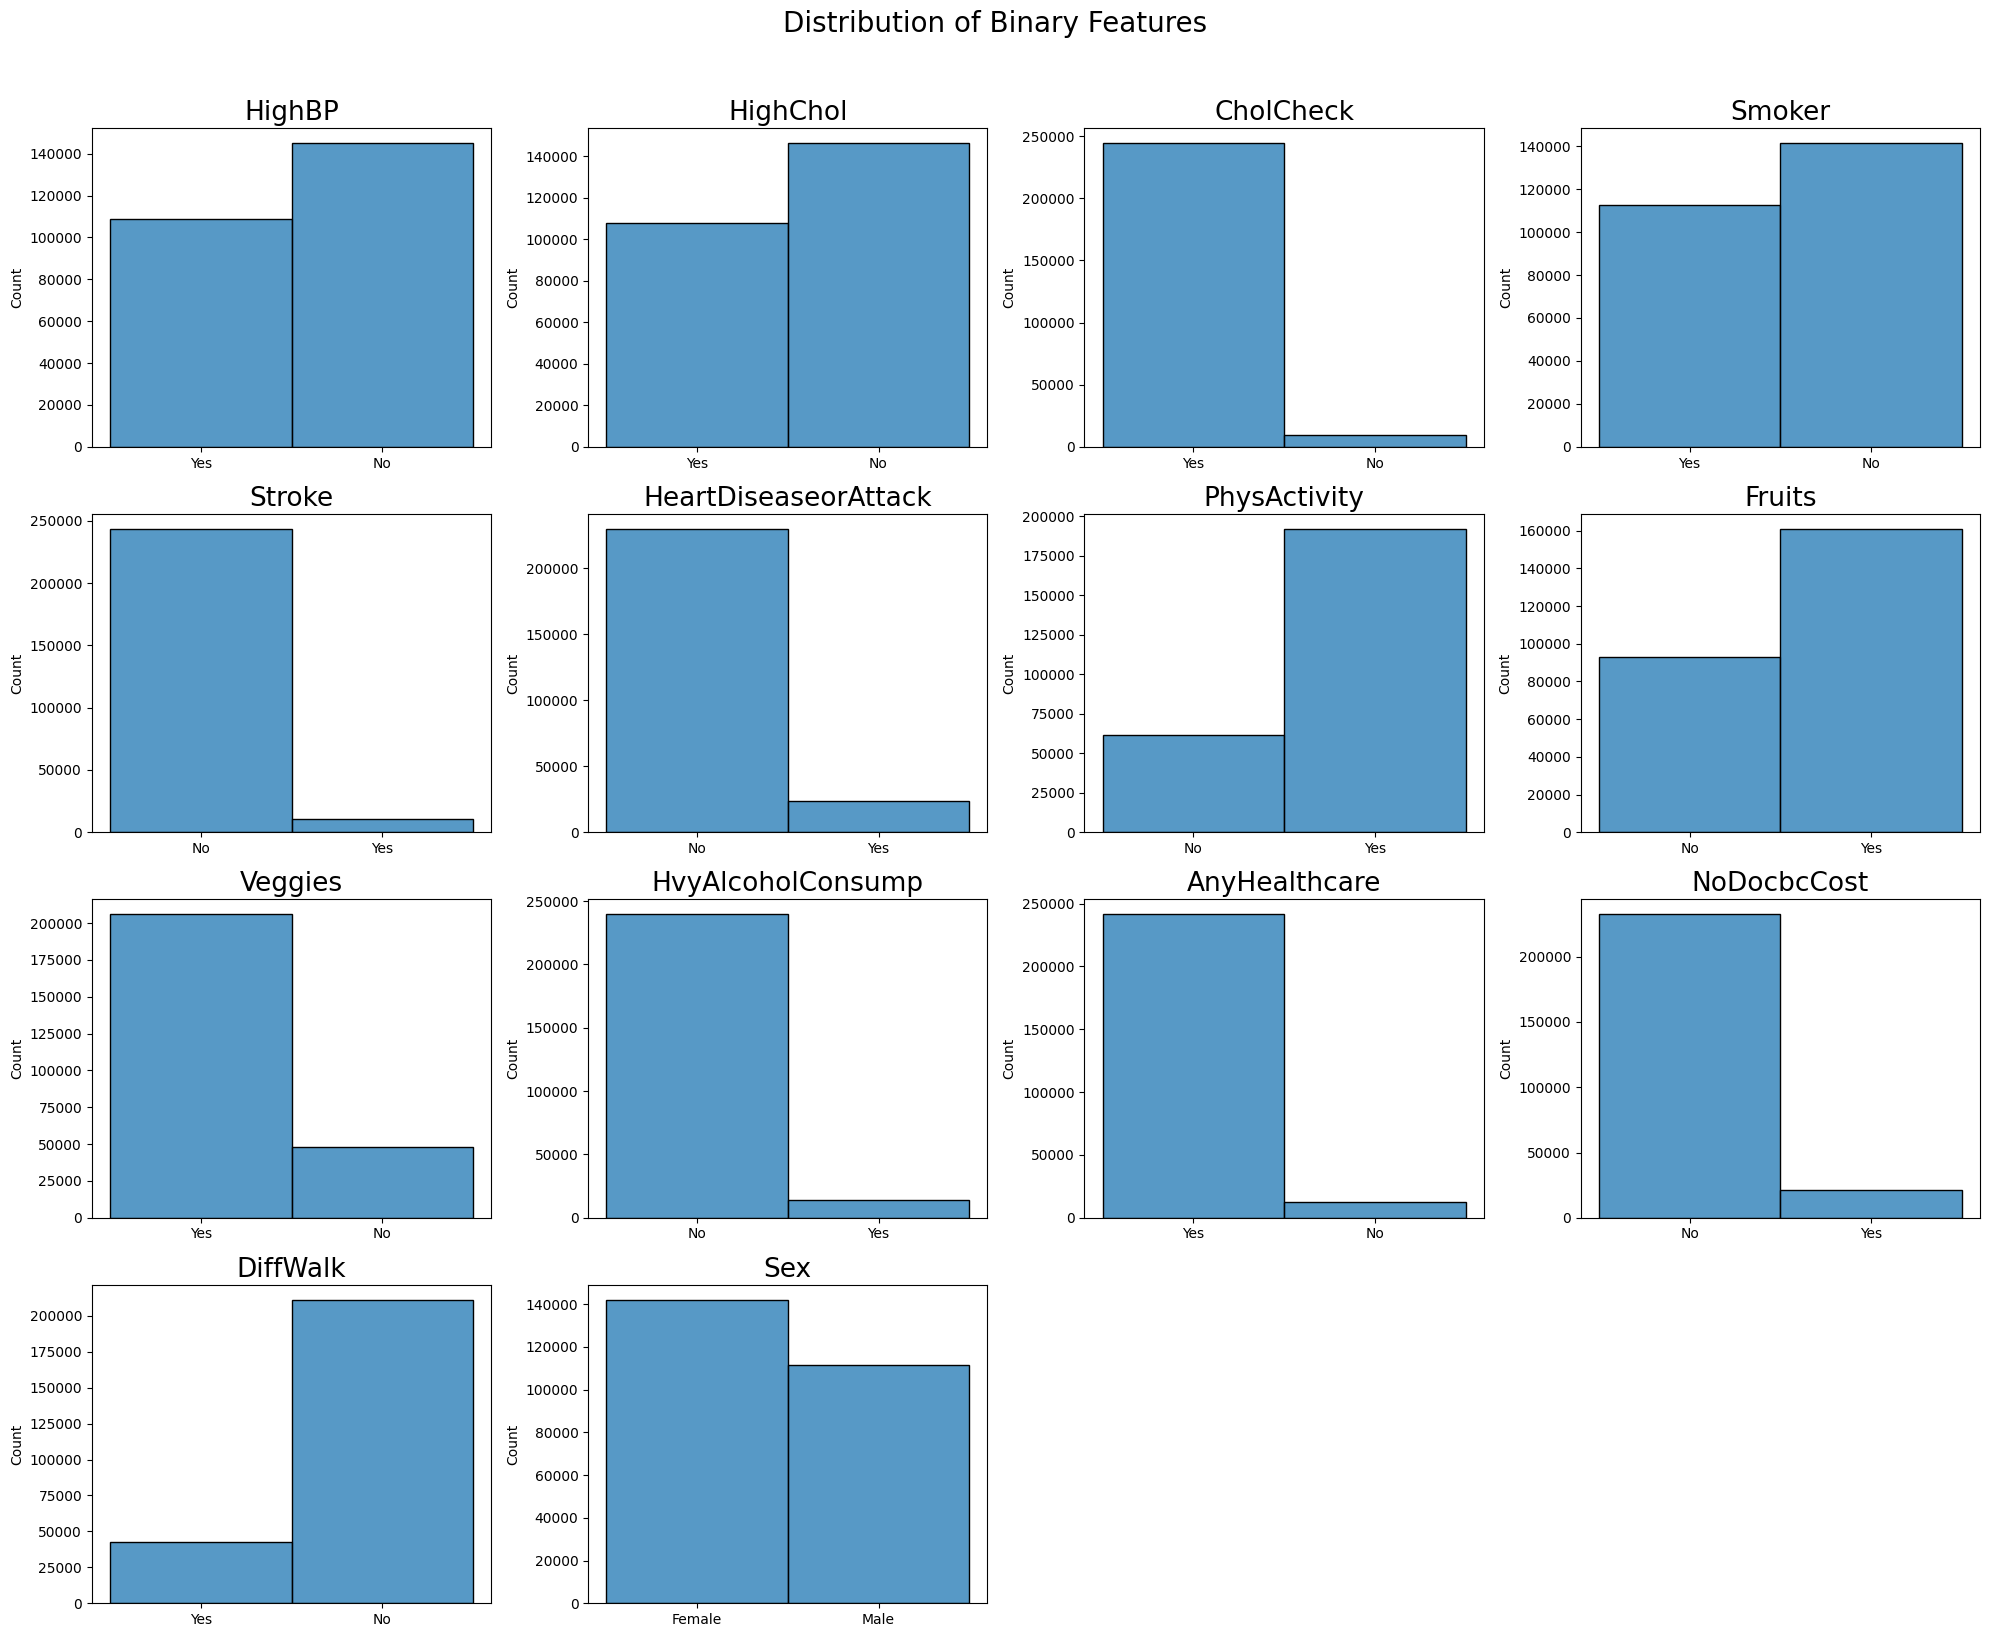

In [10]:
n_cols = 4
n_rows = math.ceil(len(binary_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(n_cols * 5, n_rows * 4)
)

axes = axes.flatten()

for ax, col in zip(axes, binary_cols):
    sns.histplot(
        data=df_decoded,
        x=col,
        bins=2,
        discrete=True,
        ax=ax
    )
    ax.set_title(col, fontsize=19)
    ax.set_xticks([0, 1])
    ax.set_xlabel("")
    ax.set_ylabel("Count")

# Xóa subplot dư
for i in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Binary Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

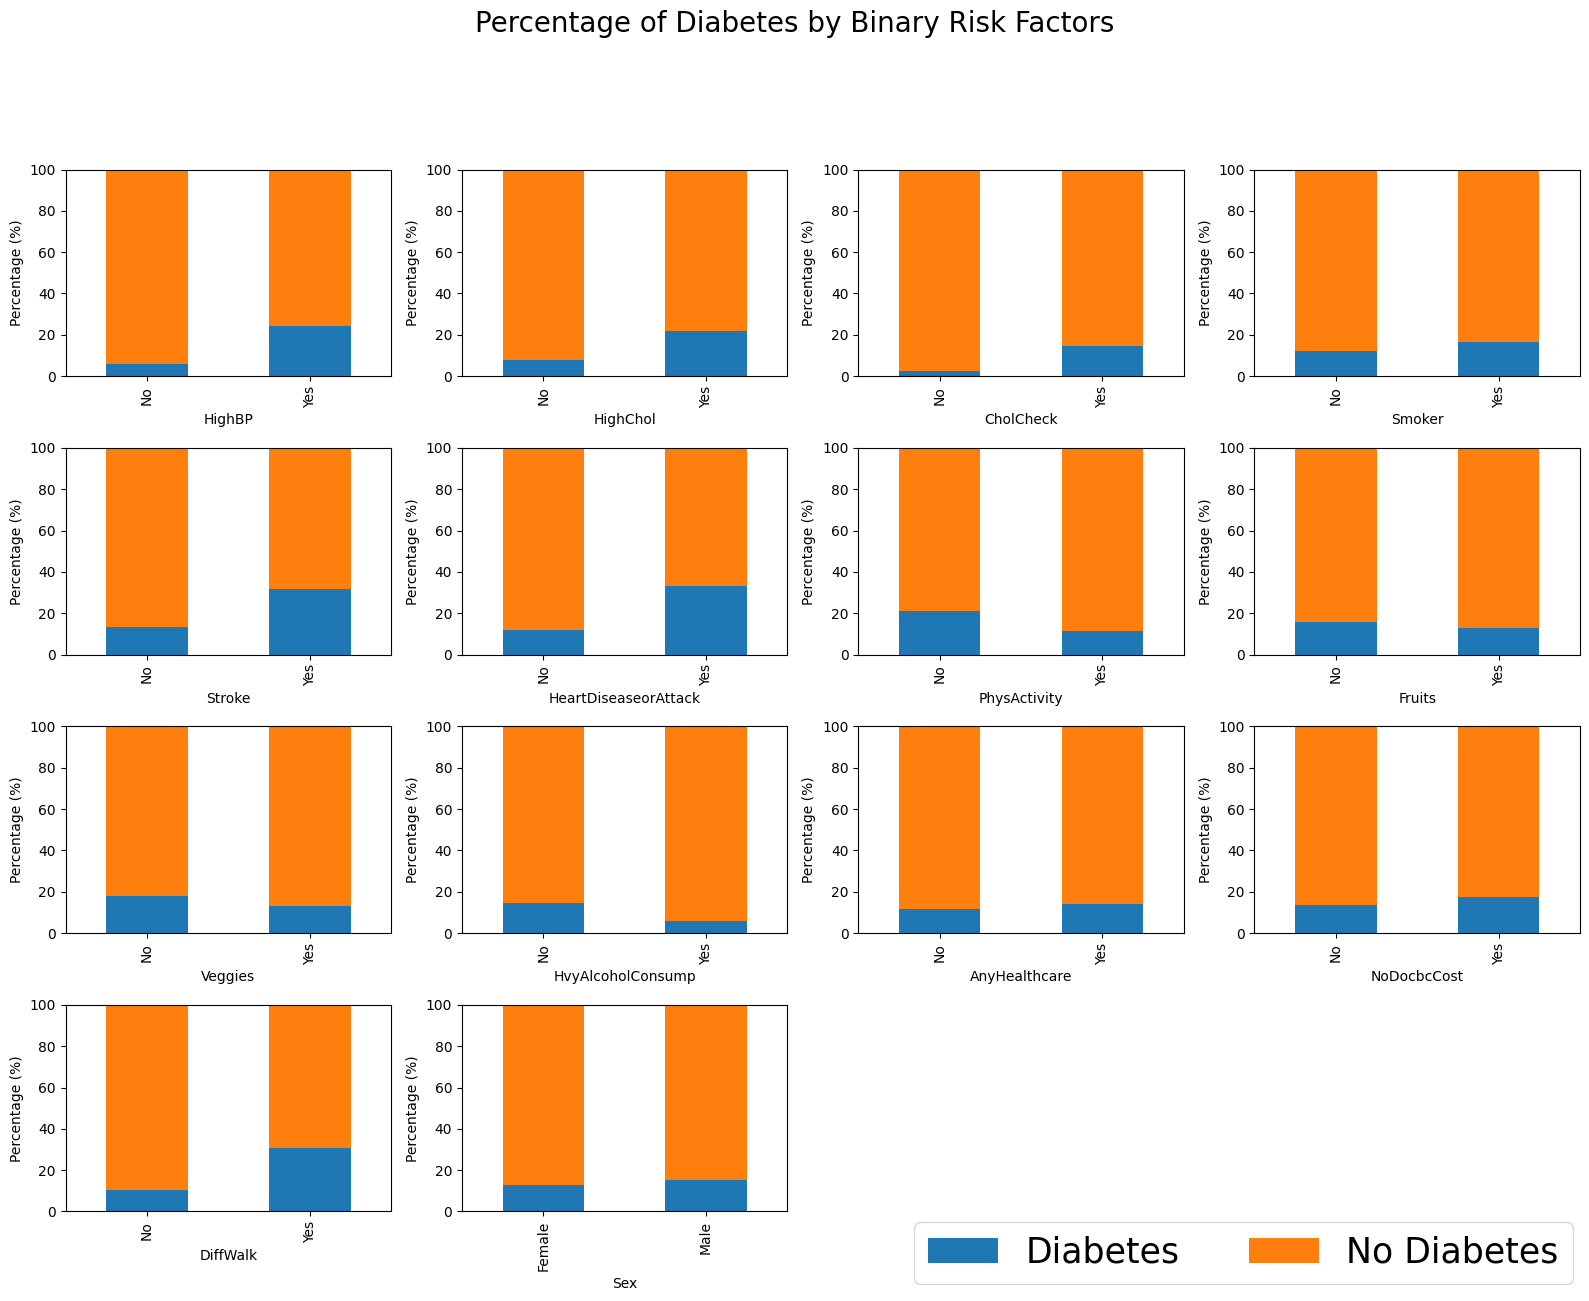

In [11]:
n_cols = 4
n_rows = math.ceil(len(binary_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(n_cols * 4, n_rows * 3)
)

axes = axes.flatten()

for ax, col in zip(axes, binary_cols):
    prop_df = (
        df_decoded
        .groupby(col)["Diabetes_binary"]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

    prop_df["proportion"] *= 100

    pivot_df = prop_df.pivot(
        index=col,
        columns="Diabetes_binary",
        values="proportion"
    )

    pivot_df = pivot_df.sort_index()

    pivot_df.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        legend=False
    )

    
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel(col)
    ax.set_ylim(0, 100)

# Xóa subplot dư
for i in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[i])

# LEGEND CHUNG
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    ["Diabetes", "No Diabetes"],
    loc="lower right",
    ncol=2,
    fontsize=25
)

plt.suptitle("Percentage of Diabetes by Binary Risk Factors", fontsize=20, y=1.08)
plt.tight_layout()
plt.show()

Ordinal

In [12]:
ordinal_cols = ["GenHlth", "Education", "Income", "AgeGroup"]
df_decoded[ordinal_cols].describe().T

,count,unique,top,freq
GenHlth,253680,5,Very good,89084
Education,253680,6,College graduate,107325
Income,253680,8,≥ $75k,90385
AgeGroup,253680,4,65+,89070


In [13]:
genhlth_order = [
    "Excellent", "Very good", "Good", "Fair", "Poor"
]

education_order = [
    "No schooling / Kindergarten",
    "Elementary (1–8)",
    "Some high school (9–11)",
    "High school graduate",
    "Some college / Technical",
    "College graduate"
]

income_order = [
    "< $10k",
    "$10k – $15k",
    "$15k – $20k",
    "$20k – $25k",
    "$25k – $35k",
    "$35k – $50k",
    "$50k – $75k",
    "≥ $75k"
]

agegroup_order = ["18–39", "40–54", "55–64", "65+"]


In [14]:
df_decoded["GenHlth_cat"] = df["GenHlth"].map(genhlth_map)
df_decoded["Education_cat"] = df["Education"].map(education_map)
df_decoded["Income_cat"] = df["Income"].map(income_map)
df_decoded["Age_cat"] = df["Age"].map(income_map)

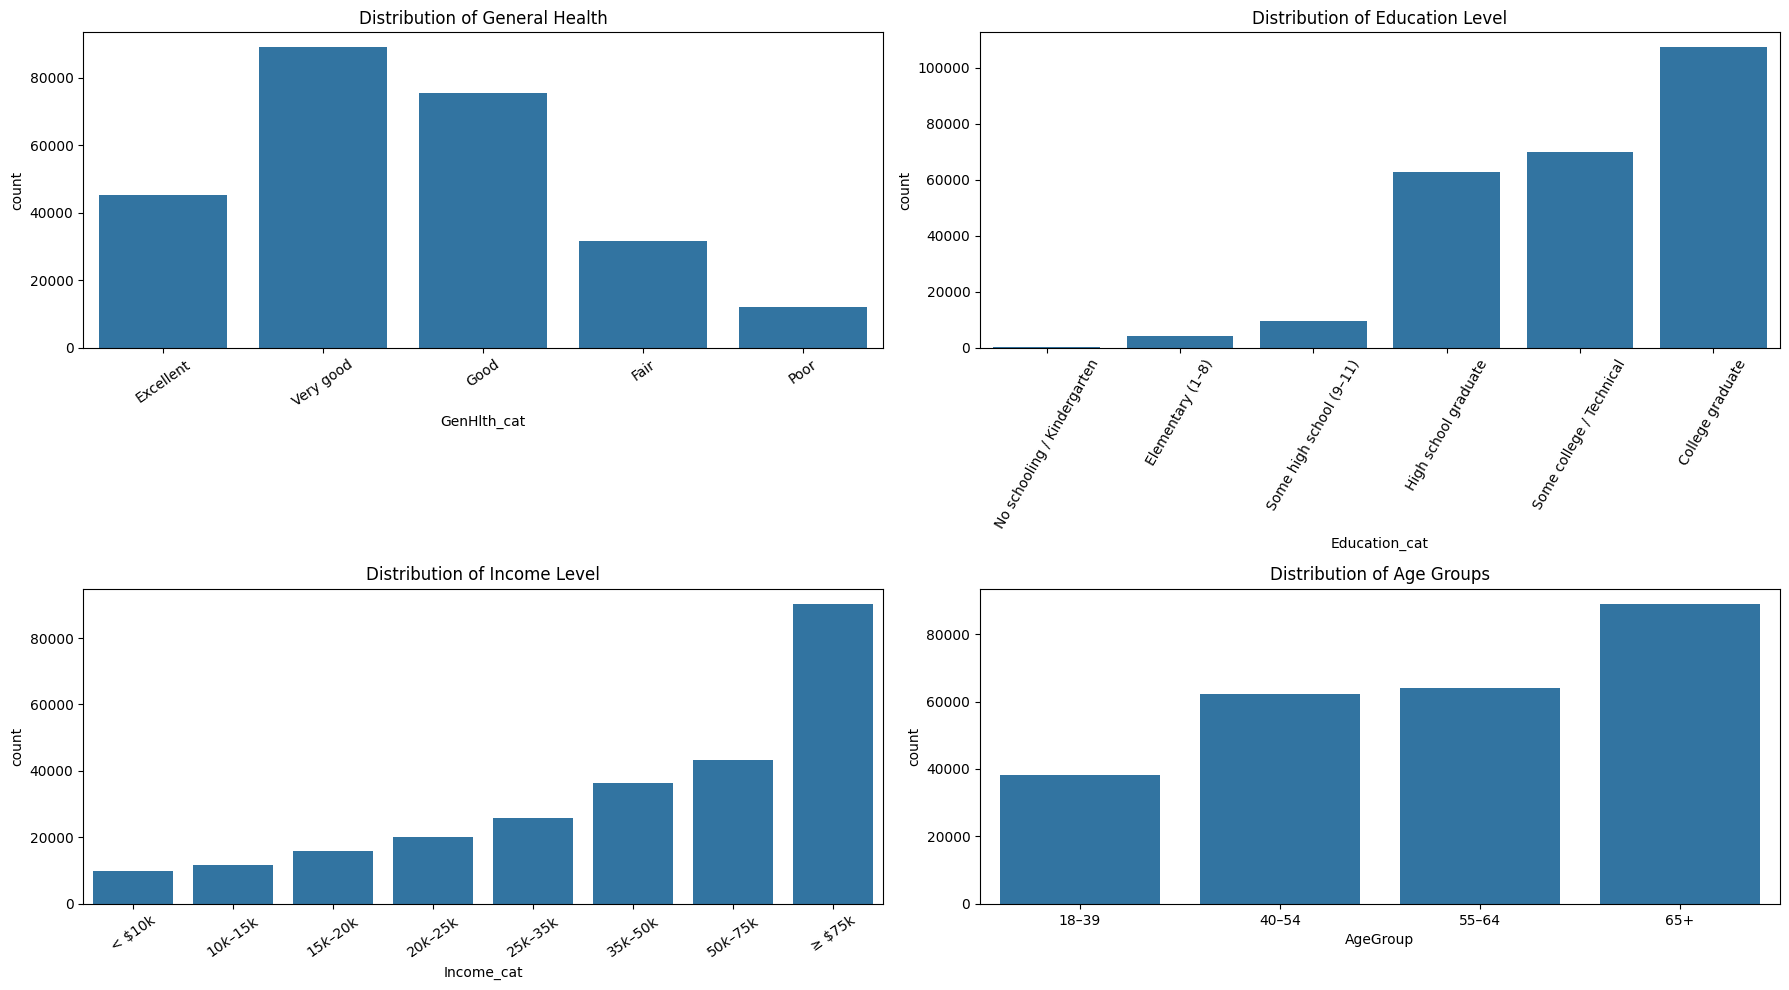

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
axes = axes.flatten()

# 1️⃣ General Health
sns.countplot(
    data=df_decoded,
    x="GenHlth_cat",
    order=genhlth_order,
    ax=axes[0]
)
axes[0].set_title("Distribution of General Health")
axes[0].tick_params(axis="x", rotation=35)

# 2️⃣ Education
sns.countplot(
    data=df_decoded,
    x="Education_cat",
    order=education_order,
    ax=axes[1]
)
axes[1].set_title("Distribution of Education Level")
axes[1].tick_params(axis="x", rotation=60)

# 3️⃣ Income
sns.countplot(
    data=df_decoded,
    x="Income_cat",
    order=income_order,
    ax=axes[2]
)
axes[2].set_title("Distribution of Income Level")
axes[2].tick_params(axis="x", rotation=35)

# 4️⃣ Age Group
sns.countplot(
    data=df_decoded,
    x="AgeGroup",
    order=agegroup_order,
    ax=axes[3]
)
axes[3].set_title("Distribution of Age Groups")
axes[3].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()


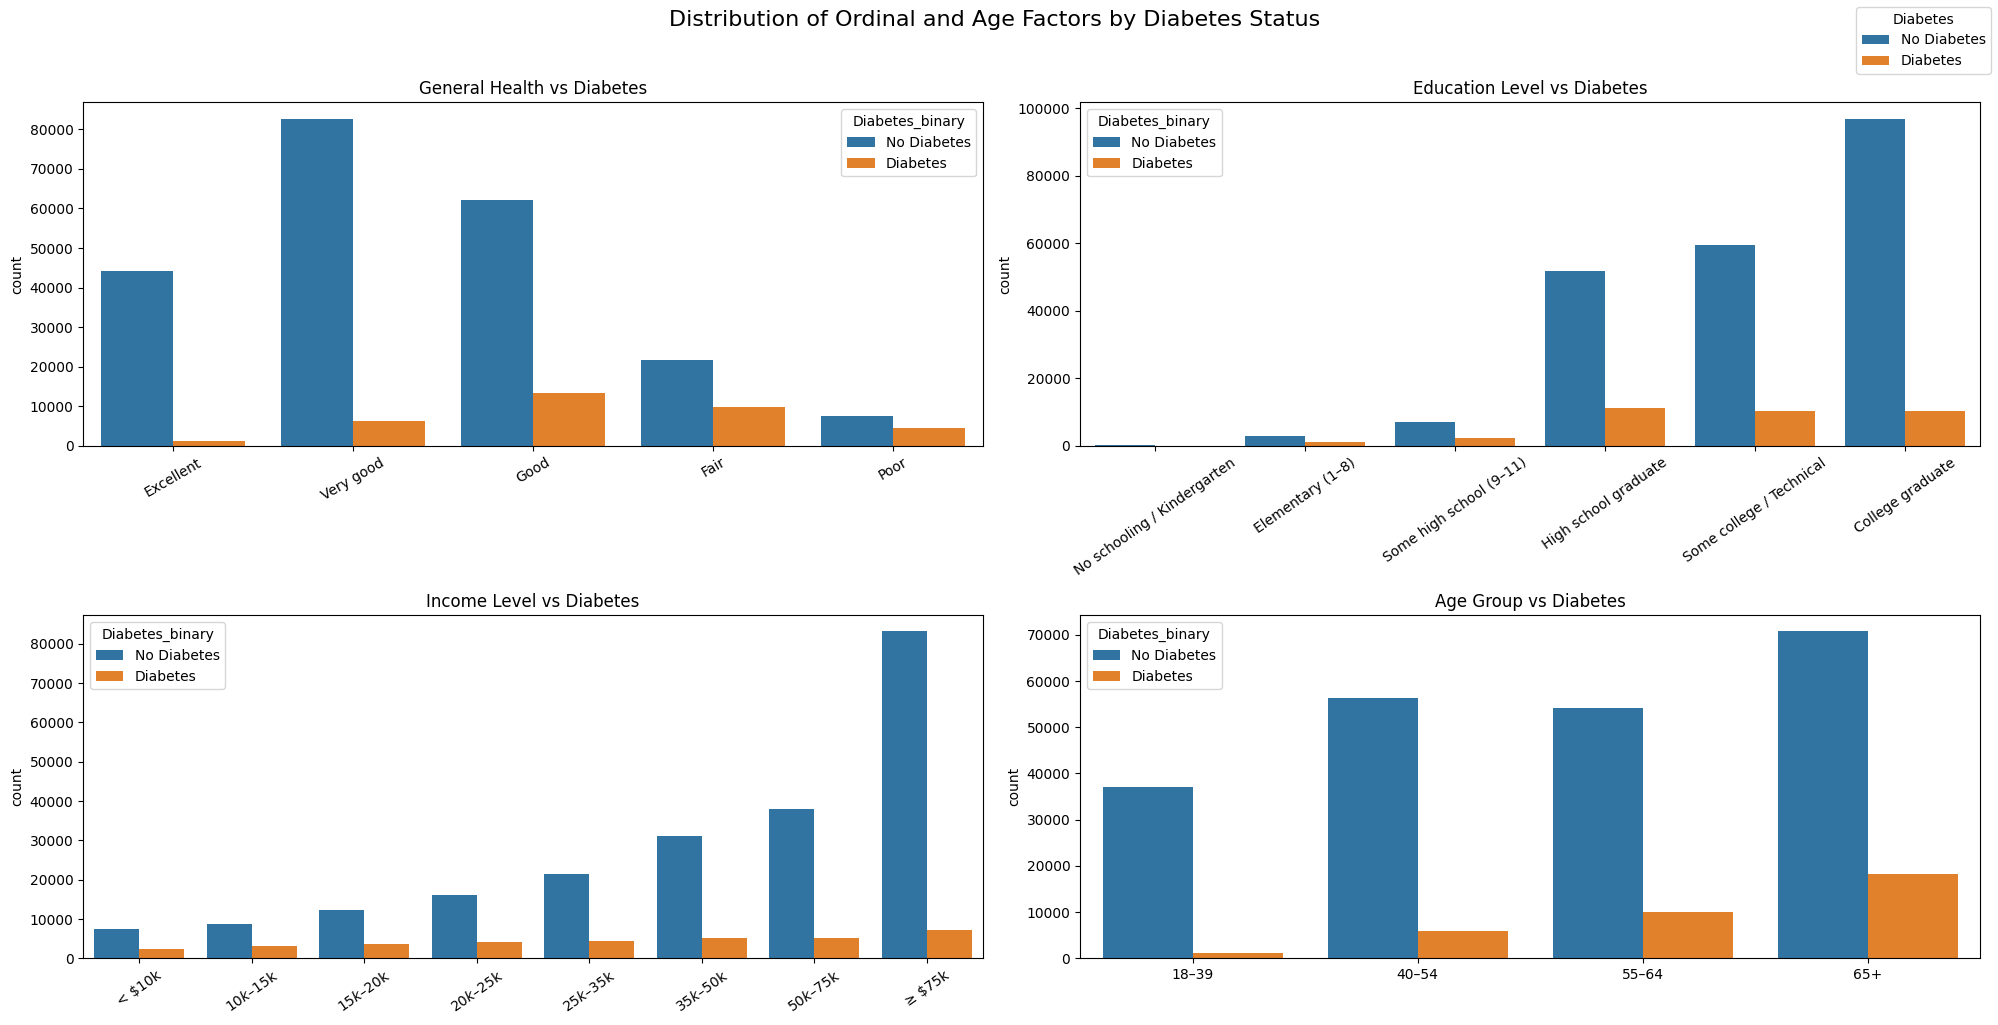

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
axes = axes.flatten()

# --- General Health ---
sns.countplot(
    data=df_decoded,
    x="GenHlth_cat",
    hue="Diabetes_binary",
    order=genhlth_order,
    ax=axes[0]
)
axes[0].set_title("General Health vs Diabetes")
axes[0].set_xlabel("")
axes[0].tick_params(axis="x", rotation=30)

# --- Education ---
sns.countplot(
    data=df_decoded,
    x="Education_cat",
    hue="Diabetes_binary",
    order=education_order,
    ax=axes[1]
)
axes[1].set_title("Education Level vs Diabetes")
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation=35)

# --- Income ---
sns.countplot(
    data=df_decoded,
    x="Income_cat",
    hue="Diabetes_binary",
    order=income_order,
    ax=axes[2]
)
axes[2].set_title("Income Level vs Diabetes")
axes[2].set_xlabel("")
axes[2].tick_params(axis="x", rotation=35)

# --- Age Group ---
sns.countplot(
    data=df_decoded,
    x="AgeGroup",
    hue="Diabetes_binary",
    order=agegroup_order,
    ax=axes[3]
)
axes[3].set_title("Age Group vs Diabetes")
axes[3].set_xlabel("")
axes[3].tick_params(axis="x", rotation=0)

# Legend chung
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    ["No Diabetes", "Diabetes"],
    title="Diabetes",
    loc="upper right"
)

plt.suptitle(
    "Distribution of Ordinal and Age Factors by Diabetes Status",
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()

PHÂN TÍCH TƯƠNG QUAN

Binary

In [17]:
import numpy as np
from scipy.stats import chi2_contingency

def phi_correlation(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    return np.sqrt(chi2 / n)

phi_results = {}

for col in binary_cols:
    phi_results[col] = phi_correlation(
        df_decoded[col],
        df_decoded["Diabetes_binary"]
    )

phi_df = (
    pd.DataFrame.from_dict(phi_results, orient="index", columns=["Phi"])
    .sort_values("Phi", ascending=False)
)



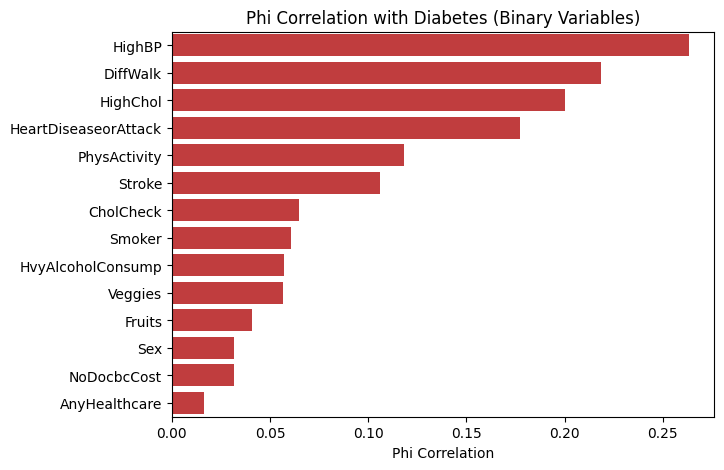

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=phi_df["Phi"],
    y=phi_df.index,
    color="#d62728"
)
plt.title("Phi Correlation with Diabetes (Binary Variables)")
plt.xlabel("Phi Correlation")
plt.ylabel("")
plt.show()

Ordinal

In [19]:
ordinal_cols = ["GenHlth", "Education", "Income", "AgeGroup"]

agegroup_map = {
    "18–39": 1,
    "40–54": 2,
    "55–64": 3,
    "65+": 4
}
df["AgeGroup"] = df["Age"].apply(map_age_group)
df_tmp = df.copy()
df_tmp["AgeGroup_num"] = df_tmp["AgeGroup"].map(agegroup_map)

In [20]:
from scipy.stats import spearmanr

spearman_results = {}

for col in ["GenHlth", "Education", "Income"]:
    spearman_results[col] = spearmanr(
        df_tmp[col],
        df_tmp["Diabetes_binary"]
    ).correlation

spearman_results["AgeGroup"] = spearmanr(
    df_tmp["AgeGroup_num"],
    df_tmp["Diabetes_binary"]
).correlation

spearman_df = (
    pd.DataFrame.from_dict(spearman_results, orient="index", columns=["Spearman"])
    .sort_values("Spearman", ascending=False)
)

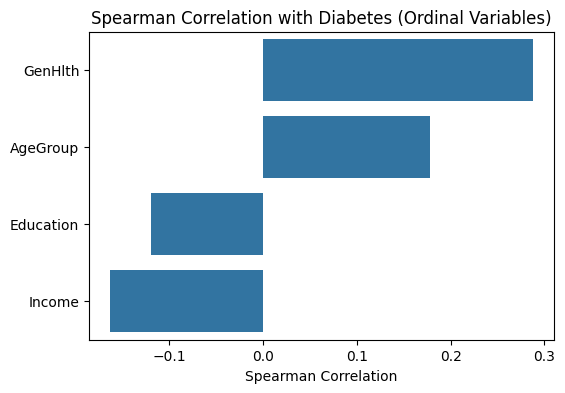

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=spearman_df["Spearman"],
    y=spearman_df.index,
    color="#1f77b4"
)
plt.title("Spearman Correlation with Diabetes (Ordinal Variables)")
plt.xlabel("Spearman Correlation")
plt.ylabel("")
plt.show()

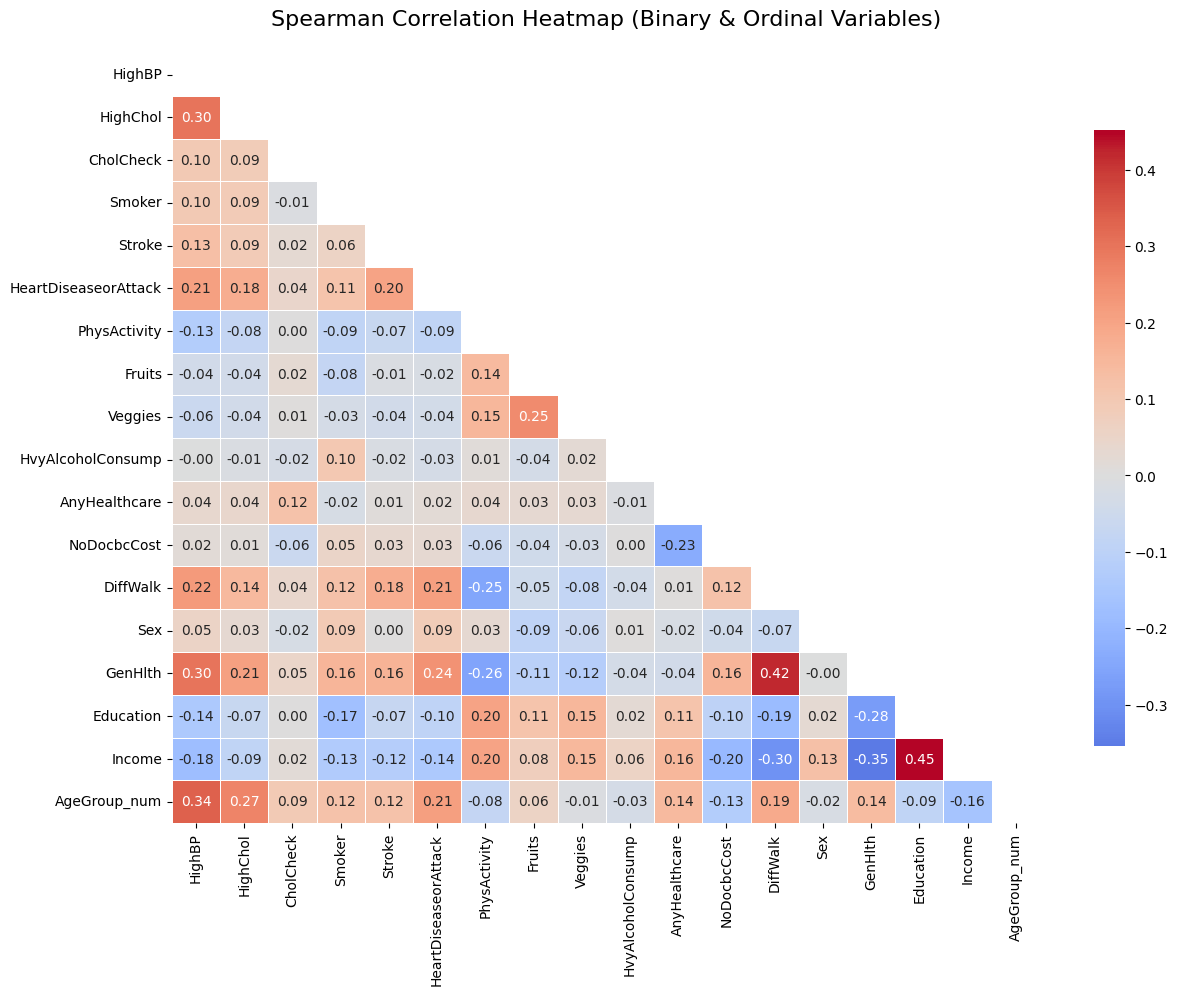

In [22]:
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]
ordinal_cols_compare = ["GenHlth", "Education", "Income", "AgeGroup_num"]

heatmap_cols = binary_cols + ordinal_cols_compare
corr_bo = df_tmp[heatmap_cols].corr(method="spearman")

plt.figure(figsize=(14,10))

mask = np.triu(np.ones_like(corr_bo, dtype=bool))

sns.heatmap(
    corr_bo,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Spearman Correlation Heatmap (Binary & Ordinal Variables)",
    fontsize=16,
    pad=20
)
plt.show()


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Chọn các biến numeric + ordinal (đã encode số)
vif_cols = [
    "BMI", "MentHlth", "PhysHlth",
    "GenHlth", "Education", "Income", "Age"
]

X_vif = df[vif_cols].dropna()

vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_df = vif_df.sort_values("VIF", ascending=False)
vif_df

,Feature,VIF
4,Education,22.621672
0,BMI,15.573038
5,Income,12.544472
3,GenHlth,9.454578
6,Age,7.274890
2,PhysHlth,1.809370
1,MentHlth,1.426430


Continuous

In [24]:
from scipy.stats import pointbiserialr

pb_results = {}

for col in continuous_cols:
    pb_results[col] = pointbiserialr(
        df_tmp["Diabetes_binary"],
        df_tmp[col]
    ).correlation

pb_df = (
    pd.DataFrame.from_dict(pb_results, orient="index", columns=["PointBiserial"])
    .sort_values("PointBiserial", ascending=False)
)

In [25]:
from scipy.stats import pointbiserialr

pb_results = {}

for col in continuous_cols:
    pb_results[col] = pointbiserialr(
        df_tmp["Diabetes_binary"],
        df_tmp[col]
    ).correlation

pb_df = (
    pd.DataFrame.from_dict(pb_results, orient="index", columns=["PointBiserial"])
    .sort_values("PointBiserial", ascending=False)
)

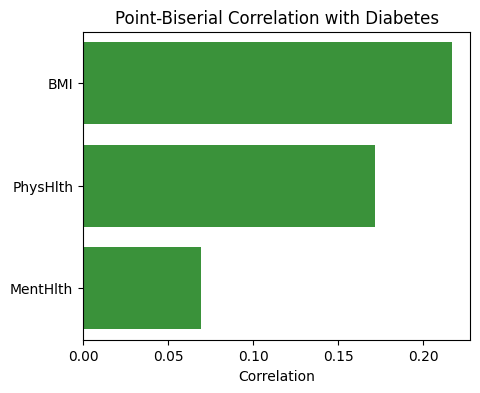

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(
    x=pb_df["PointBiserial"],
    y=pb_df.index,
    color="#2ca02c"
)
plt.title("Point-Biserial Correlation with Diabetes")
plt.xlabel("Correlation")
plt.ylabel("")
plt.show()

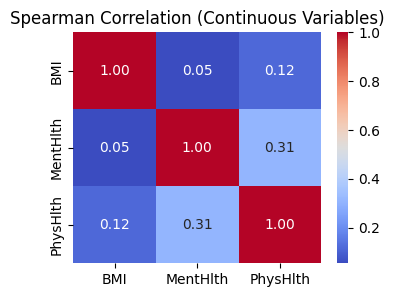

In [27]:
corr_cont = df_tmp[continuous_cols].corr(method="spearman")

plt.figure(figsize=(4,3))
sns.heatmap(
    corr_cont,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Spearman Correlation (Continuous Variables)")
plt.show()

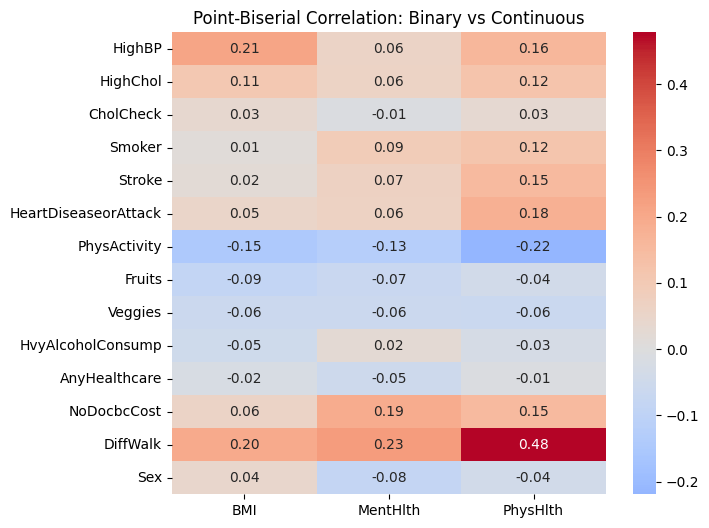

In [28]:
df_corr = df.copy()


corr_bc = pd.DataFrame(
    index=binary_cols,
    columns=continuous_cols,
    dtype=float
)

for b in binary_cols:
    for c in continuous_cols:
        corr_bc.loc[b, c] = pointbiserialr(
            df_corr[b],
            df_corr[c]
        ).correlation


plt.figure(figsize=(7,6))
sns.heatmap(
    corr_bc.astype(float),
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Point-Biserial Correlation: Binary vs Continuous")
plt.show()

In [29]:
# đảm bảo AgeGroup là số
df_corr = df_tmp.copy()

corr_oc = pd.DataFrame(
    index=ordinal_cols_compare,
    columns=continuous_cols,
    dtype=float
)

from scipy.stats import spearmanr

for o in ordinal_cols_compare:
    for c in continuous_cols:
        corr_oc.loc[o, c] = spearmanr(
            df_corr[o],
            df_corr[c]
        ).correlation


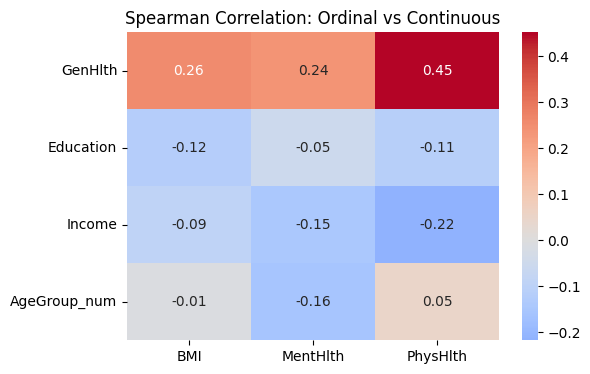

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_oc.astype(float),
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Spearman Correlation: Ordinal vs Continuous")
plt.show()

In [31]:
def plot_binary_pie_safe(df, col):
    values = df[col].dropna().unique()

    if len(values) != 2:
        print(f"⚠️ {col} không phải binary")
        return

    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    for ax, val in zip(axes, values):
        subset = df[df[col] == val]

        vc = subset["Diabetes_binary"].value_counts()

        # ❗ Nếu chỉ có 1 class hoặc rỗng → bỏ
        if vc.shape[0] < 2:
            ax.text(
                0.5, 0.5,
                "Not enough data",
                ha="center", va="center", fontsize=11
            )
            ax.set_title(f"{col} = {val}")
            ax.axis("off")
            continue

        ax.pie(
            vc,
            labels=vc.index,
            autopct="%.1f%%",
            startangle=90
        )
        ax.set_title(f"{col} = {val}")

    plt.suptitle(f"Diabetes Distribution by {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

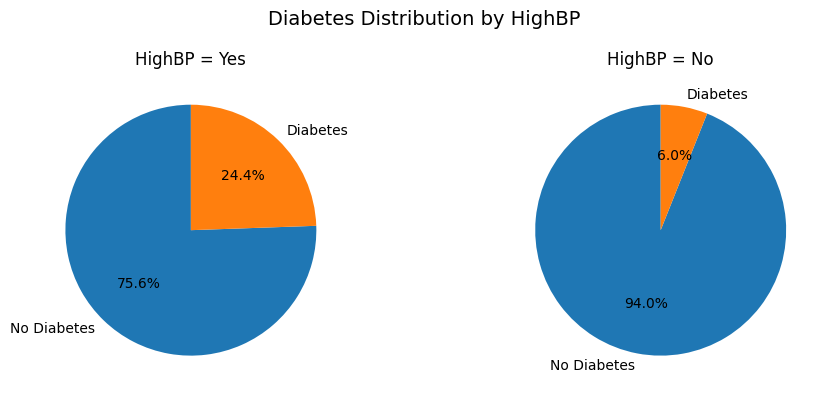

In [32]:
plot_binary_pie_safe(df_decoded, "HighBP")